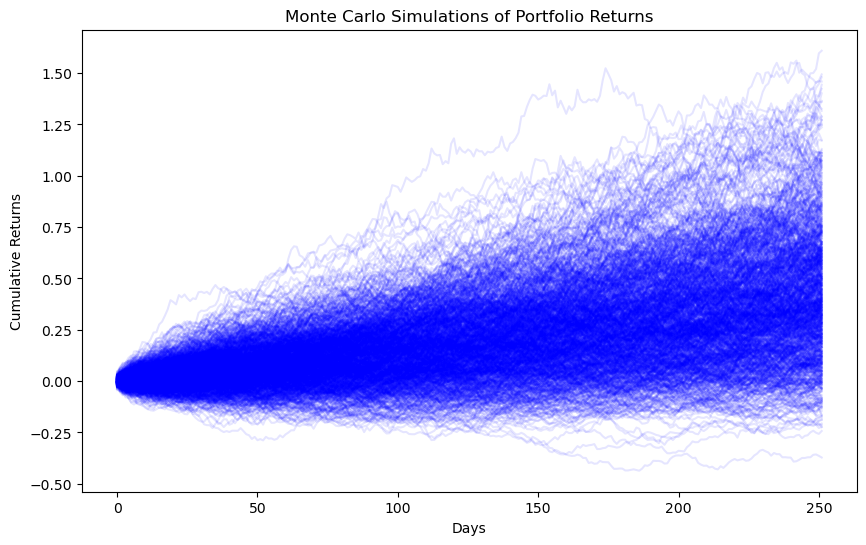

Value at Risk (VaR) at 95% confidence level: -0.0215
Conditional Value at Risk (CVaR) at 95% confidence level: -0.0339
Sharpe Ratio: -4.9128
Sortino Ratio: -5.8260
Maximum Drawdown: -0.3995
Annualized Return: 0.4012
Annualized Volatility: 0.2215


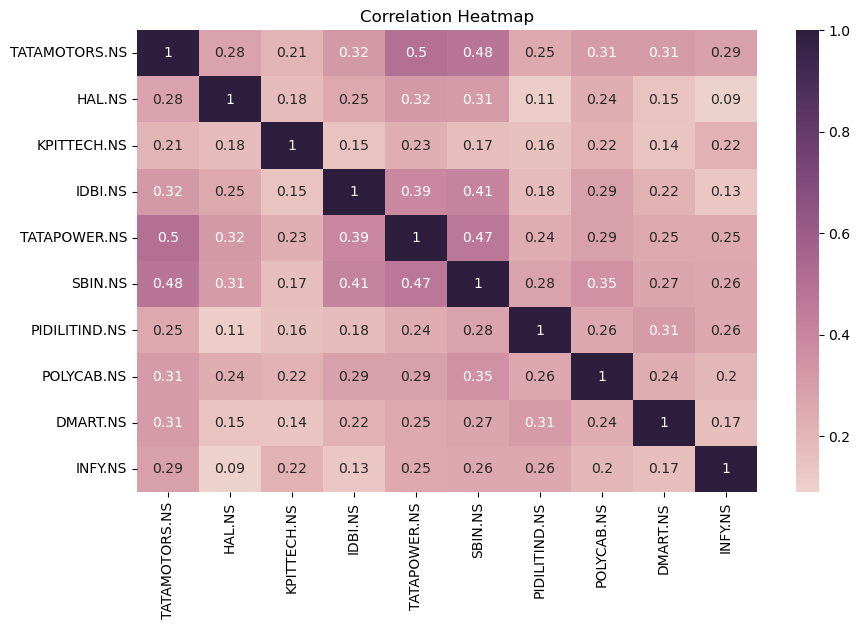

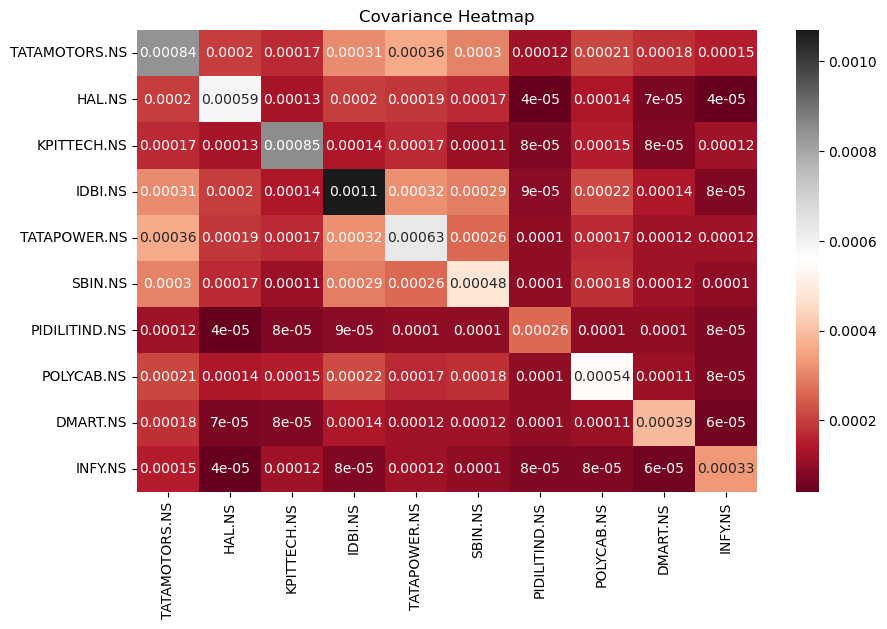

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_data(tickers):
    data = {}
    for ticker in tickers:
        stock_data = yf.Ticker(ticker).history(period="5y")
        data[ticker] = stock_data['Close']
    
    df = pd.DataFrame(data)      # Creates a dataframe with closeing (or 'Close' as per Yahoo Finance) prices for all the stocks
    return df

def fetch_market_caps(tickers):
    market_caps = {}
    for ticker in tickers:
        stock_info = yf.Ticker(ticker).info
        market_caps[ticker] = stock_info.get('marketCap', 0)
    return market_caps

def calculate_weights(market_caps):
    total_market_cap = sum(market_caps.values())
    weights = {ticker: cap / total_market_cap for ticker, cap in market_caps.items()}
    return weights

def calculate_daily_returns(df):
    returns_df = df.pct_change().dropna()
    return returns_df

def calculate_portfolio_returns(returns_df, weights):
    portfolio_returns = (returns_df * weights).sum(axis=1)
    return portfolio_returns

def export_to_csv(df, portfolio_returns, file_prefix='portfolio_India'):
    df.to_csv(f'{file_prefix}_historical_data.csv', index=True)
    portfolio_returns.to_csv(f'{file_prefix}_portfolio_returns.csv', index=True)

def calculate_var(returns, confidence_level=0.95):
    var = np.percentile(returns, (1-confidence_level)*100)
    return var

def calculate_cvar(returns, confidence_level=0.95):
    var = calculate_var(returns, confidence_level)
    cvar = returns[returns <= var].mean()
    return cvar

def calculate_sharpe_ratio(returns, risk_free_rate=0.07):
    mean_return = returns.mean()
    std_dev = returns.std()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    return sharpe_ratio

def calculate_sortino_ratio(returns, risk_free_rate=0.07):
    mean_return = returns.mean()
    downside_std_dev = returns[returns < 0].std()
    sortino_ratio = (mean_return - risk_free_rate) / downside_std_dev
    return sortino_ratio

def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

def calculate_annualized_return(returns):
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    return annualized_return

def calculate_annualized_volatility(returns):
    annualized_volatility = returns.std() * np.sqrt(252)
    return annualized_volatility

def correlation_matrix(df):
    return df.corr()

def covariance_matrix(df):
    return df.cov()

def monte_carlo_simulation(returns, num_simulations=1000, num_days=252):
    simulations = np.zeros((num_simulations, num_days))
    for i in range(num_simulations):
        simulated_returns = np.random.normal(returns.mean(), returns.std(), num_days)
        simulations[i, :] = np.cumprod(1 + simulated_returns) - 1
    return simulations

def plot_simulations(simulations):
    plt.figure(figsize=(10, 6))
    plt.plot(simulations.T, color='blue', alpha=0.1)
    plt.title('Monte Carlo Simulations of Portfolio Returns')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Returns')
    plt.show()

def main():
    tickers = [
        'TATAMOTORS.NS', 'HAL.NS', 'KPITTECH.NS', 'IDBI.NS', 'TATAPOWER.NS',
        'SBIN.NS', 'PIDILITIND.NS', 'POLYCAB.NS', 'DMART.NS', 'INFY.NS'
    ]
    
    # Fetch data
    df = fetch_data(tickers)
    market_caps = fetch_market_caps(tickers)
    weights = calculate_weights(market_caps)
    
    # Calculate returns
    returns_df = calculate_daily_returns(df)
    portfolio_returns = calculate_portfolio_returns(returns_df, weights)
    
    # Risk Metrics
    var = calculate_var(portfolio_returns)
    cvar = calculate_cvar(portfolio_returns)
    sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)
    sortino_ratio = calculate_sortino_ratio(portfolio_returns)
    max_drawdown = calculate_max_drawdown(portfolio_returns)
    annualized_return = calculate_annualized_return(portfolio_returns)
    annualized_volatility = calculate_annualized_volatility(portfolio_returns)
    
    # Correlation and Covariance
    corr_matrix = correlation_matrix(returns_df).round(2)
    cov_matrix = covariance_matrix(returns_df).round(5)
    
    # Monte Carlo Simulation
    simulations = monte_carlo_simulation(portfolio_returns)
    plot_simulations(simulations)
    
    # Print results
    print(f"Value at Risk (VaR) at 95% confidence level: {var:.4f}")
    print(f"Conditional Value at Risk (CVaR) at 95% confidence level: {cvar:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"Sortino Ratio: {sortino_ratio:.4f}")
    print(f"Maximum Drawdown: {max_drawdown:.4f}")
    print(f"Annualized Return: {annualized_return:.4f}")
    print(f"Annualized Volatility: {annualized_volatility:.4f}")

    # Plot heatmaps
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))  
    plt.title('Correlation Heatmap')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.heatmap(cov_matrix, annot=True, cmap='RdGy')  
    plt.title('Covariance Heatmap')
    plt.show()

    # Export data to CSV
    export_to_csv(df, portfolio_returns)

    # If you need matrix instead
    """
    print("\nCorrelation Matrix:")
    print(corr_matrix)
    print("\nCovariance Matrix:")
    print(cov_matrix)
    """

if __name__ == "__main__":
    main()